Normalization is a technique often applied as part of data prepration formachine learning. The goal of normilazation is to change the values of numeric columns in the dataset to use a common scale, without distorting diffrence in the range of values or losing information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/wine_data.csv',header=None, usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [7]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


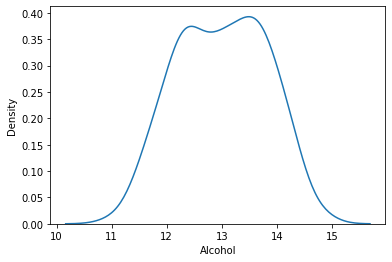

In [8]:
sns.kdeplot(df['Alcohol'])

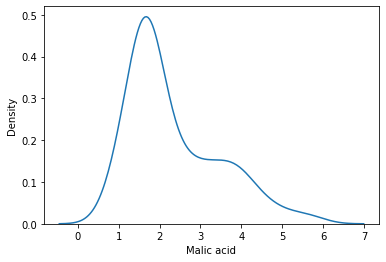

In [9]:
sns.kdeplot(df['Malic acid'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


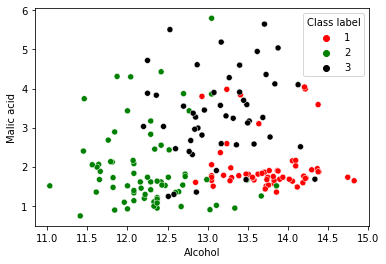

In [14]:
color_dist={1:'red',2:'green',3:'black'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dist)

In [15]:
from sklearn.model_selection import train_test_split 

In [17]:
X_train,X_test,y_train,y_test=train_test_split (df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=True)

In [20]:
X_train.shape

(124, 2)

In [19]:
X_test.shape

(54, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [30]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,12.9,2.5
std,0.8,1.2
min,11.0,0.9
25%,12.3,1.6
50%,13.0,2.0
75%,13.5,3.4
max,14.8,5.8


In [31]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


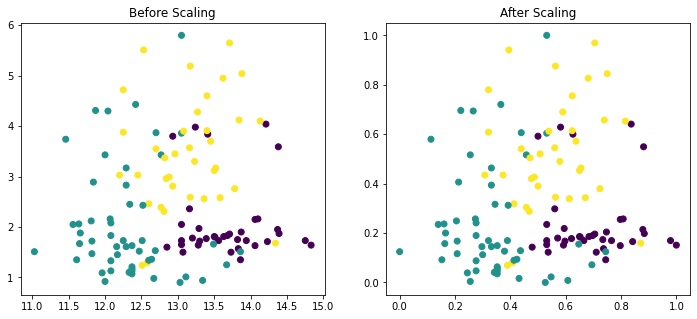

In [33]:
import matplotlib.pyplot  as plt


fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

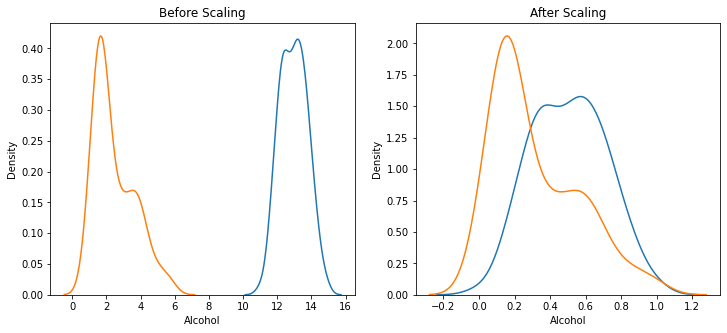

In [34]:
import seaborn as sns
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

#Mean Normalization

Sklearn doesn't have any class we have to implement from scratch

#MaxAbsScaling

Use: If we have spark matrices or we have zero data in most cell we use this technique

In [35]:
from sklearn.preprocessing import MaxAbsScaler

In [36]:
scaler = MaxAbsScaler()

In [37]:
scaler.fit(X_train)

MaxAbsScaler()

In [38]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

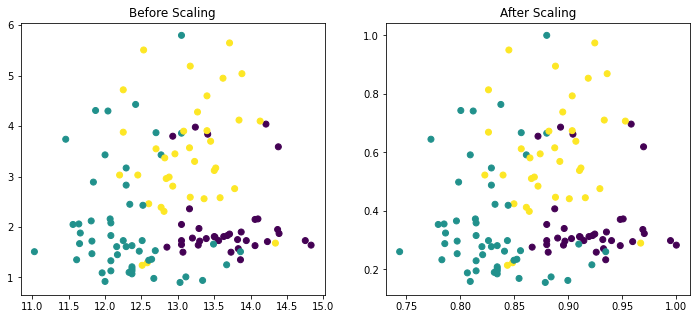

In [40]:
import matplotlib.pyplot  as plt


fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

In [41]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


# Robust Scaling

Use : Robust to outliers,if data have lot of outliers